In [8]:
#@title Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,roc_auc_score,roc_curve,precision_score,recall_score,balanced_accuracy_score,top_k_accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [9]:
#@title Task 01
#Reading

dataset = pd.read_csv('data.csv')
dataset.drop('Unnamed: 32',axis=1,inplace=True)
target = 'diagnosis'
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
dataset.hist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Figure size 1000x800 with 0 Axes>

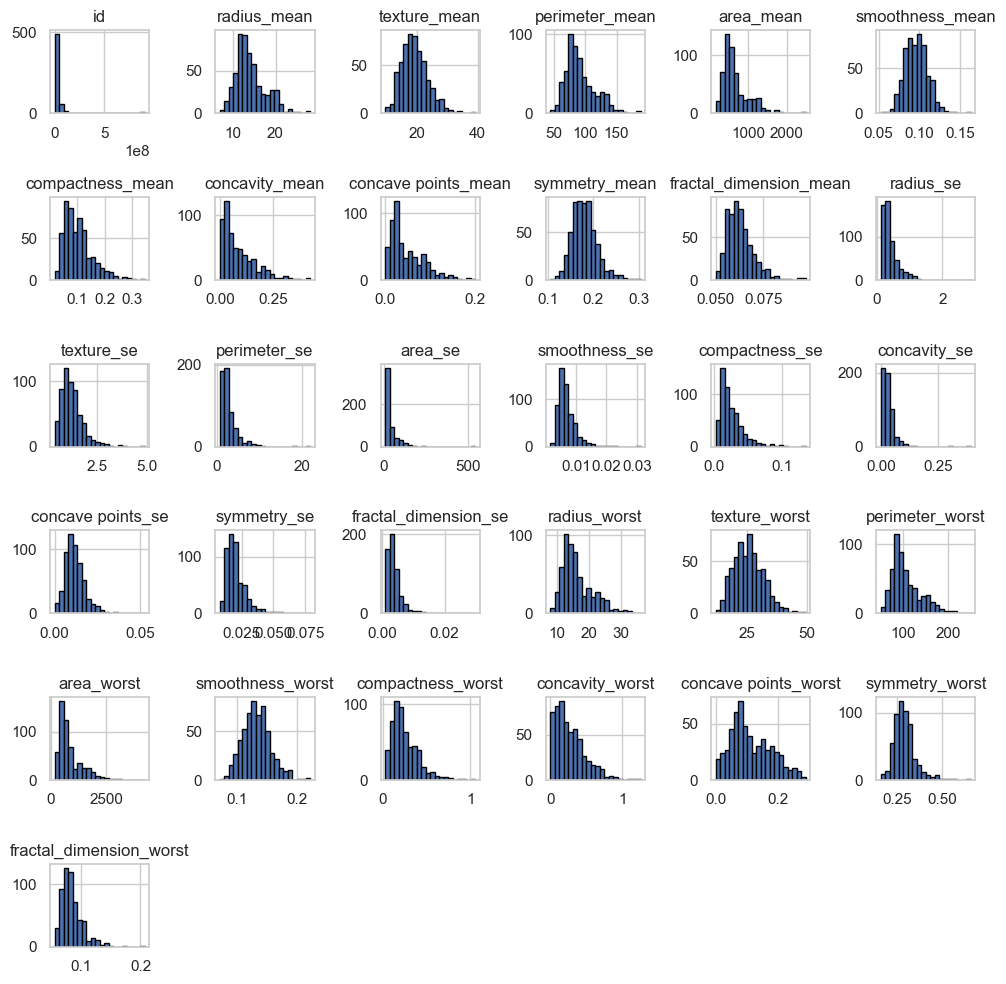


Target Class Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64


In [10]:
#@title PartA-EDA AND DATA WRANGLING
#(Basic Infromation And Statistical Summary)
print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

# Feature distributions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
dataset.hist(bins=20, figsize=(10, 10), layout=(6, 6), edgecolor="black")
plt.tight_layout()
plt.show()

# Target Class Distribution
print("\nTarget Class Distribution:")
print(dataset[target].value_counts())

In [ ]:
if dataset.isnull().values.any():
    missingValues = dataset.isnull().sum()
    print("Missing Values:\n", missingValues)

    cleanedDataset = dataset.fillna(dataset.mean())
    print("Dataset After Removing Missing Values: ", cleanedDataset)
else:
    print("No missing values in the dataset.")


if dataset.duplicated().any():
    duplicateRecords = dataset.duplicated().sum()
    print("\nDuplicate Records:\n", duplicateRecords)

    cleanedDataset = dataset.drop_duplicates()
    print("Dataset After Removing Duplicates: ", cleanedDataset)
else:
    print("No duplicate records in the dataset.")

categoricalFeatures = dataset.select_dtypes(include=['object']).columns
print("\nCategorical Features:\n", categoricalFeatures)
dataset.info()

No missing values in the dataset.
No duplicate records in the dataset.

Categorical Features:
 Index(['diagnosis'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  ra

In [12]:
#Splitting

X = dataset.drop(target, axis=1)
Y = dataset[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
#Applying KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

yTrainPredKnn = knn.predict(X_train)
yTestPredKnn = knn.predict(X_test)

trainAccKnn = accuracy_score(Y_train, yTrainPredKnn)
testAccKnn = accuracy_score(Y_test, yTestPredKnn)
print(f'Accuracy on training data: {trainAccKnn}')
print(f'Accuracy on testing data: {testAccKnn}')

tpTrKnn, tnTrKnn, fpTrKnn, fnTrKnn = confusion_matrix(Y_train, yTrainPredKnn).ravel()
print(f"\nK-NN Training: TP={tpTrKnn}, TN={tnTrKnn}, FP={fpTrKnn}, FN={fnTrKnn}")

tpTeKnn, tnTeKnn, fpTeKnn, fnTeKnn = confusion_matrix(Y_test, yTestPredKnn).ravel()
print(f"K-NN Testing: TP={tpTeKnn}, TN={tnTeKnn}, FP={fpTeKnn}, FN={fnTeKnn}")

Accuracy on training data: 0.8417582417582418
Accuracy on testing data: 0.7543859649122807

K-NN Training: TP=277, TN=9, FP=63, FN=106
K-NN Testing: TP=63, TN=8, FP=20, FN=23


In [14]:
#Applying SVM

svm_model = SVC()
svm_model.fit(X_train, Y_train)

yTrainPredSVM = svm_model.predict(X_train)
yTestPredSVM  = svm_model.predict(X_test)

trainAccSVM = accuracy_score(Y_train, yTrainPredSVM)
testAccSVM  = accuracy_score(Y_test, yTestPredSVM)
print(f'Accuracy on training data: {trainAccSVM}')
print(f'Accuracy on testing data: {testAccSVM}')

tpTrSVM, tnTrSVM, fpTrSVM, fnTrSVM = confusion_matrix(Y_train, yTrainPredSVM).ravel()
print(f"\nK-NN Training: TP={tpTrSVM}, TN={tnTrSVM}, FP={fpTrSVM}, FN={fnTrSVM}")

tpTeSVM, tnTeSVM, fpTeSVM, fnTeSVM = confusion_matrix(Y_test, yTestPredSVM).ravel()
print(f"K-NN Testing: TP={tpTeSVM}, TN={tnTeSVM}, FP={fpTeSVM}, FN={fnTeSVM}")

Accuracy on training data: 0.6285714285714286
Accuracy on testing data: 0.6228070175438597

K-NN Training: TP=286, TN=0, FP=169, FN=0
K-NN Testing: TP=71, TN=0, FP=43, FN=0


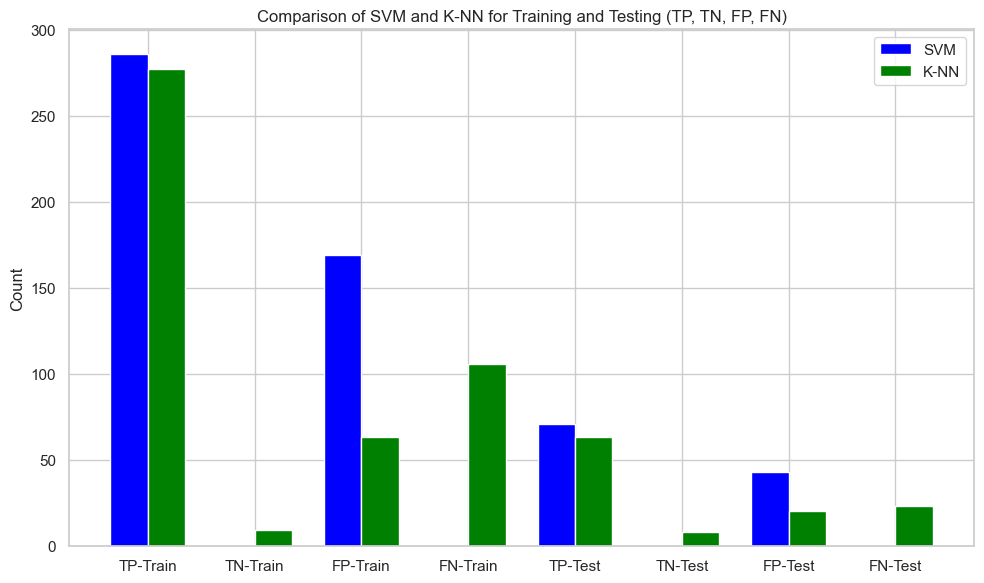

In [ ]:
#Plotting

labels = ['TP', 'TN', 'FP', 'FN']
svmMetrics = (tpTrSVM, tnTrSVM, fpTrSVM, fnTrSVM ) + (tpTeSVM, tnTeSVM, fpTeSVM, fnTeSVM)  # Combine training and testing for SVM
knnMetrics = (tpTrKnn, tnTrKnn, fpTrKnn, fnTrKnn) + (tpTeKnn, tnTeKnn, fpTeKnn, fnTeKnn)  # Combine training and testing for K-NN

x = np.arange(len(labels) * 2)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar()

barSvm = ax.bar(x - width/2, svmMetrics, width, label='SVM', color='blue')
barKnn = ax.bar(x + width/2, knnMetrics, width, label='K-NN', color='green')

ax.set_ylabel('Count')
ax.set_title('Comparison of SVM and K-NN for Training and Testing (TP, TN, FP, FN)')
ax.set_xticks(x)
ax.set_xticklabels(['TP-Train', 'TN-Train', 'FP-Train', 'FN-Train', 'TP-Test', 'TN-Test', 'FP-Test', 'FN-Test'])
ax.legend()

plt.tight_layout()
plt.show()

In [16]:
import math
from sklearn.metrics import matthews_corrcoef
# for knn evaluation metrics of training data

print('=================KNN training================: \n')
accTrKnn = (tpTrKnn + tnTrKnn) / (tpTrKnn + tnTrKnn + fpTrKnn + fnTrKnn)
print(f'Accuracy: {accTrKnn}')

sensTrKnn = tpTrKnn / (tpTrKnn + fnTrKnn)
print(f"Sensitivity: {sensTrKnn}")

specTrKnn = tnTrKnn / (tnTrKnn + fpTrKnn)
print(f"Specificity: {specTrKnn}")

gmTrKnn = math.sqrt(sensTrKnn * specTrKnn)
print(f"Geometric Mean: {gmTrKnn}")

fdrTrKnn = fpTrKnn /(fpTrKnn + tpTrKnn)
print(f"FDR: {fdrTrKnn}")

forTrKnn = fnTrKnn / (fnTrKnn + tnTrKnn)
print(f"FOR: {forTrKnn}")

mccTrKnn = ((tpTrKnn * tnTrKnn) - (fpTrKnn * fnTrKnn)) / math.sqrt((tpTrKnn + fpTrKnn) *(tpTrKnn + fnTrKnn) * (tnTrKnn + fpTrKnn) * (tnTrKnn + fnTrKnn))
print(f"MCC: {mccTrKnn}")

=================KNN training================: 

Accuracy: 0.6285714285714286
Sensitivity: 0.7232375979112271
Specificity: 0.125
Geometric Mean: 0.30067374301542094
FDR: 0.18529411764705883
FOR: 0.9217391304347826
MCC: -0.12745047207548427


In [17]:
# KNN TEsting

print('=================KNN Testing================: \n')
accTeKnn = (tpTeKnn + tnTeKnn) / (tpTeKnn + tnTeKnn + fpTeKnn + fnTeKnn)
print(f'Accuracy: {accTeKnn}')

sensTeKnn = tpTeKnn / (tpTeKnn + fnTeKnn)
print(f"Sensitivity: {sensTeKnn}")

specTeKnn = tnTeKnn / (tnTeKnn + fpTeKnn)
print(f"Specificity: {specTeKnn}")

gmTeKnn = math.sqrt(sensTeKnn * specTeKnn)
print(f"Geometric Mean: {gmTeKnn}")

fdrTeKnn = fpTeKnn /(fpTeKnn + tpTeKnn)
print(f"FDR: {fdrTeKnn}")

forTeKnn = fnTeKnn / (fnTeKnn + tnTeKnn)
print(f"FOR: {forTeKnn}")

mccTeKnn = ((tpTeKnn * tnTeKnn) - (fpTeKnn * fnTeKnn)) / math.sqrt(((tpTeKnn + fpTeKnn) *(tpTeKnn + fnTeKnn) * (tnTeKnn + fpTeKnn) * (tnTeKnn + fnTeKnn)))
print(f"MCC: {mccTeKnn}")

=================KNN Testing================: 

Accuracy: 0.6228070175438597
Sensitivity: 0.7325581395348837
Specificity: 0.2857142857142857
Geometric Mean: 0.457495710997814
FDR: 0.24096385542168675
FOR: 0.7419354838709677
MCC: 0.017676836382293632


In [18]:
# SVM Evaluation evaluation metrics of training data
print('===============SVM training===============\n')

accuracy = (tpTrSVM + tnTrSVM) / (tpTrSVM + tnTrSVM + fpTrSVM + fnTrSVM)
print(f'Accuracy: {accuracy}')

sensitivity = tpTrSVM / (tpTrSVM + fnTrSVM)
print(f"Sensitivity: {sensitivity}")

specificity = tnTrSVM / (tnTrSVM + fpTrSVM)
print(f"Specificity: {specificity}")

geometricMean = math.sqrt(sensitivity * specificity)
print(f"Geometric Mean: {geometricMean}")

fdr = fpTrSVM /(fpTrSVM + tpTrSVM)
print(f"FDR: {fdr}")

fOr = fnTrSVM / (fnTrSVM + tnTrSVM)
print(f"FOR: {fOr}")

mcc = ((tpTrSVM * tnTrSVM) - (fpTrSVM * fnTrSVM)) / math.sqrt((tpTrSVM + fpTrSVM) *(tpTrSVM + fnTrSVM) * (tnTrSVM + fpTrSVM) * (tnTrSVM + fnTrSVM))
print(f"MCC: {mcc}")

===============SVM training===============

Accuracy: 0.6285714285714286
Sensitivity: 1.0
Specificity: 0.0
Geometric Mean: 0.0
FDR: 0.37142857142857144
FOR: nan
MCC: nan


C:\Users\Fast123\AppData\Local\Temp\ipykernel_208\3475535268.py:19: RuntimeWarning: invalid value encountered in scalar divide
  fOr = fnTrSVM / (fnTrSVM + tnTrSVM)
C:\Users\Fast123\AppData\Local\Temp\ipykernel_208\3475535268.py:22: RuntimeWarning: invalid value encountered in divide
  mcc = ((tpTrSVM * tnTrSVM) - (fpTrSVM * fnTrSVM)) / math.sqrt((tpTrSVM + fpTrSVM) *(tpTrSVM + fnTrSVM) * (tnTrSVM + fpTrSVM) * (tnTrSVM + fnTrSVM))


In [19]:
#@title Task 03

#Work on the same dataset , with complete EDA and Data Wrangling
# Already Done in previous tasks!!

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [28]:
models = {
    "Linear": SVC(kernel="linear"),
    "Linear(C=1)": SVC(kernel="linear", C=1),
    "Linear(C=10)": SVC(kernel="linear", C=10),
    "Polynomial(degree=2, C=1)": SVC(kernel="poly", degree=2, C=1),
    "Polynomial(degree=2, C=10)": SVC(kernel="poly", degree=2, C=10),
    "Polynomial(degree=3, C=1)": SVC(kernel="poly", degree=3, C=1),
    "Polynomial(degree=3, C=10)": SVC(kernel="poly", degree=3, C=10),
    "RBF (gamma=0.5, C=1)": SVC(kernel="rbf", gamma=0.5, C=1),
    "RBF (gamma=0.5, C=10)": SVC(kernel="rbf", gamma=0.5, C=10),
}

# Train each model and store accuracy
accuracies = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(Y_test, y_pred)
    
print(accuracies)


{'Linear': 0.956140350877193, 'Linear(C=1)': 0.956140350877193, 'Linear(C=10)': 0.9473684210526315, 'Polynomial(degree=2, C=1)': 0.7894736842105263, 'Polynomial(degree=2, C=10)': 0.8245614035087719, 'Polynomial(degree=3, C=1)': 0.868421052631579, 'Polynomial(degree=3, C=10)': 0.956140350877193, 'RBF (gamma=0.5, C=1)': 0.7719298245614035, 'RBF (gamma=0.5, C=10)': 0.7894736842105263}


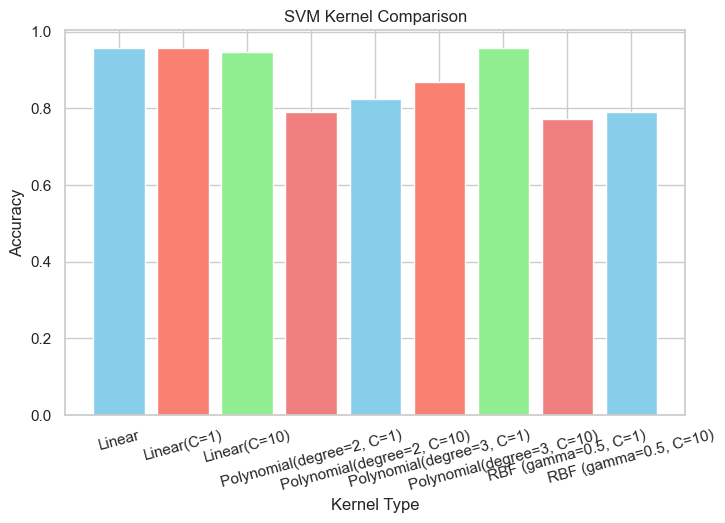

In [29]:
# Plotting accuracies for each kernel
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.title("SVM Kernel Comparison")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()
